In [1]:
import os.path as op
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
prefix = "/work/scratch/malinoro/histogram_transfer"

In [3]:
img1 = cv.cvtColor(cv.imread(op.join(prefix, "conesF", "im2.ppm")), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(op.join(prefix, "teddyF", "im2.ppm")), cv.COLOR_BGR2RGB)

bgr1_planes = cv.split(img1)
bgr2_planes = cv.split(img2)


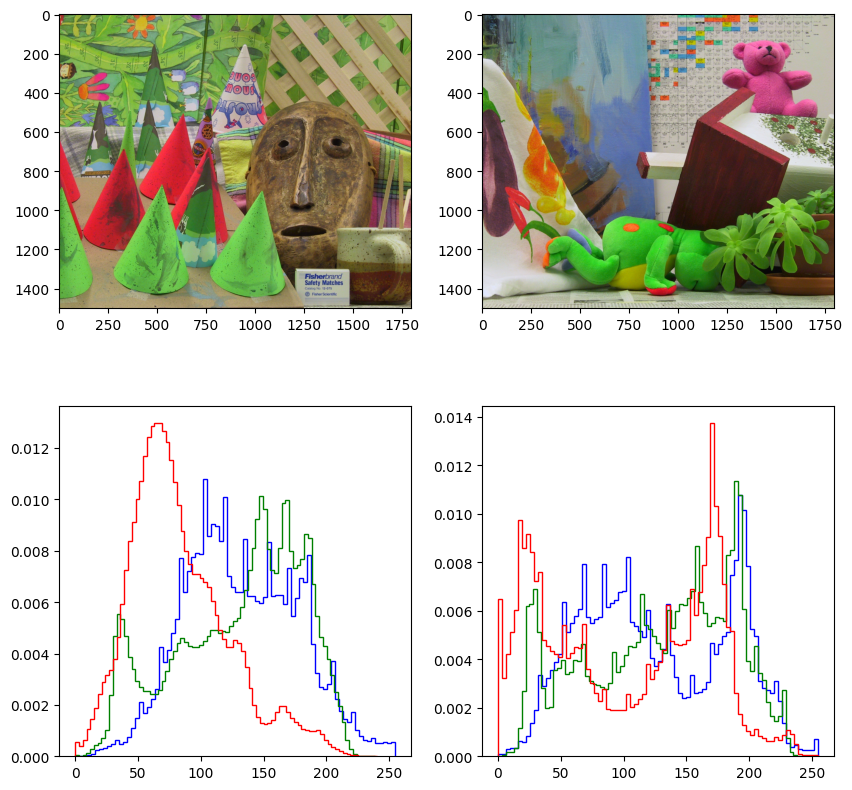

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes[0, 0].imshow(img1)
axes[0, 1].imshow(img2)

n_bins = 80
for k, c in zip(range(3), ["b", "g", "r"]):
    counts, bins = np.histogram(bgr1_planes[k], bins=n_bins, density=True)
    axes[1, 0].stairs(counts, bins, color=c)
    
    counts, bins = np.histogram(bgr2_planes[k], bins=n_bins, density=True)
    axes[1, 1].stairs(counts, bins, color=c)
    
plt.show()

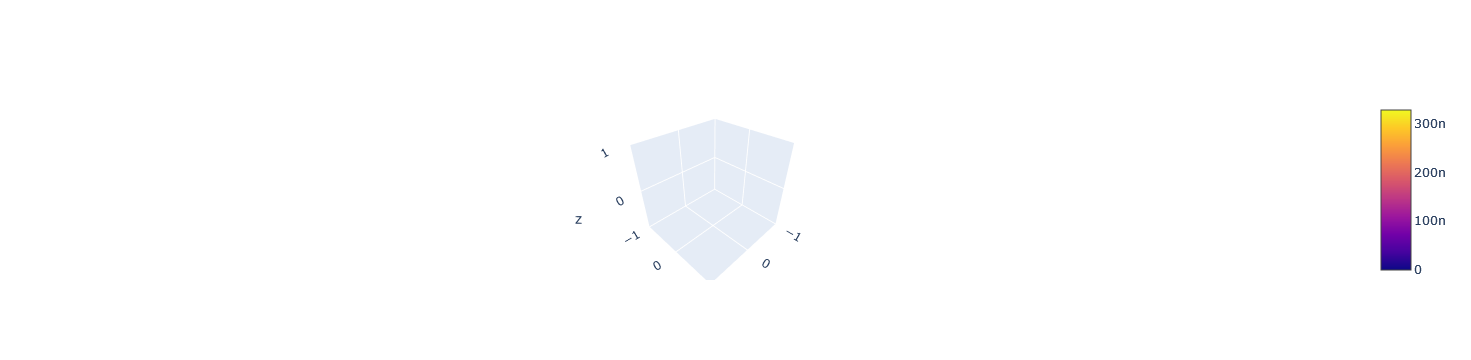

In [22]:
counts, bins = np.histogramdd(np.array(img1).reshape(-1, 3), bins=(3, 3, 3), density=True)
X, Y, Z = np.meshgrid(*bins)

fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    isomin=counts.min(),
    isomax=counts.max(),
    value=counts.flatten(),
    opacity=1, # needs to be small to see through all surfaces
    surface_count=50, # needs to be a large number for good volume rendering
    ))
fig.show()

In [23]:
counts.max()

3.284142806355457e-07

In [18]:
X

array([[[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
        [ 12.75,  12.75,  12.75, ...,  12.75,  12.75,  12.75],
        [ 25.5 ,  25.5 ,  25.5 , ...,  25.5 ,  25.5 ,  25.5 ],
        ...,
        [229.5 , 229.5 , 229.5 , ..., 229.5 , 229.5 , 229.5 ],
        [242.25, 242.25, 242.25, ..., 242.25, 242.25, 242.25],
        [255.  , 255.  , 255.  , ..., 255.  , 255.  , 255.  ]],

       [[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
        [ 12.75,  12.75,  12.75, ...,  12.75,  12.75,  12.75],
        [ 25.5 ,  25.5 ,  25.5 , ...,  25.5 ,  25.5 ,  25.5 ],
        ...,
        [229.5 , 229.5 , 229.5 , ..., 229.5 , 229.5 , 229.5 ],
        [242.25, 242.25, 242.25, ..., 242.25, 242.25, 242.25],
        [255.  , 255.  , 255.  , ..., 255.  , 255.  , 255.  ]],

       [[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
        [ 12.75,  12.75,  12.75, ...,  12.75,  12.75,  12.75],
        [ 25.5 ,  25.5 ,  25.5 , ...,  25.5 ,  25.5 ,  25.5 ],
        ...,
        [229